# Final Project Big Data - Classification

### Apache Spark with logistic regression Algorithm

- Name: Kurnia Cahya Febryanto
- Student ID: 5025201073
- Class: Big Data A

## Table of Contents
1. [Dataset Description](#dataset-description)
   - [Source of the Dataset](#source-of-the-dataset)
   - [Description of the Dataset](#description-of-the-dataset)
2. [Data Acquisition](#data-acquisition)
   - [Setting Up Kaggle API](#setting-up-kaggle-api)
   - [Downloading Dataset](#downloading-dataset)
3. [Setting Up the Environment](#setting-up-the-environment)
   - [Installation of Dependencies](#installation-of-dependencies)
   - [Setting Up Apache Spark](#setting-up-apache-spark)
4. [Data Loading and Exploration](#data-loading-and-exploration)
   - [Loading Dataset into Spark DataFrame](#loading-dataset-into-spark-dataframe)
   - [Initial Data Exploration](#initial-data-exploration)
5. [Data Preprocessing](#data-preprocessing)
   - [Handling Missing Values](#handling-missing-values)
   - [Feature Scaling/Normalization](#feature-scalingnormalization)
6. [Feature Engineering](#feature-engineering)
   - [Feature Selection](#feature-selection)
   - [Feature Preparation](#feature-preparation)
7. [Model Building](#model-building)
   - [Choice of Classification Algorithm](#choice-of-classification-algorithm)
   - [Reason for Choosing the Algorithm](#reason-for-choosing-the-algorithm)
8. [Parameter Tuning](#parameter-tuning)
   - [Initial Model Training](#initial-model-training)
   - [Hyperparameter Tuning](#hyperparameter-tuning)
   - [Retraining Model with Optimized Parameters](#retraining-model-with-optimized-parameters)
9. [Model Evaluation](#model-evaluation)
   - [Accuracy](#accuracy)
   - [Confusion Matrix](#confusion-matrix)
   - [Precision, Recall, and F1 Score](#precision-recall-f1-score)
10. [Visualization](#visualization)
    - [Data Visualization during Preprocessing](#data-visualization-during-preprocessing)
    - [Data Visualization during Evaluation](#data-visualization-during-evaluation)
11. [Conclusion](#conclusion)
12. [References](#references)

## Dataset Description <a name="dataset-description"></a>

### Source of the Dataset <a name="source-of-the-dataset"></a>

The dataset used in this project is obtained from Kaggle. It is the "Hotel Reservations Classification Dataset" and can be found at [Hotel Reservation Dataset](https://www.kaggle.com/ahsan81/hotel-reservations-classification-dataset).


### Description of the Dataset <a name="description-of-the-dataset"></a>

The `Hotel Reservations Classification Dataset` provides data pertaining to hotel reservations, which includes a variety of factors such as booking changes, deposit type, days in waiting list, and other customer details.

With the advent of online hotel reservation channels, booking behaviors of customers have significantly evolved. However, a substantial number of these reservations get cancelled or result in no-shows due to various reasons like change of plans or scheduling conflicts. While the option to cancel free of charge or at a low cost is advantageous for hotel guests, it often results in potential revenue loss for hotels.

Therefore, the objective of this project is to use this dataset to build a machine learning model that can predict whether a hotel booking will be cancelled or not. This information can potentially help hotels in better managing their resources and maximizing their revenues.

## Data Acquisition <a name="data-acquisition"></a>

### Setting Up Kaggle API <a name="setting-up-kaggle-api"></a>

To utilize Kaggle's datasets directly, we need to setup Kaggle API. You can download your kaggle.json file
from your Kaggle account settings page. The kaggle.json file is a token that connects the API to your account.

Steps to upload kaggle.json in Google Colab:
1. Run the code cell below.
2. A `Choose Files` button will appear. Click on it.
3. Navigate to the location of your kaggle.json file and select it.

In [2]:
# Import necessary library
from google.colab import files

In [99]:
# Upload kaggle.json
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"kurniacahyaf","key":"e3f28eef4d71d12989a5e93314b3e05b"}'}

In [100]:
# Make directory named kaggle and copy kaggle.json file there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file.
!chmod 600 ~/.kaggle/kaggle.json

### Downloading Dataset <a name="downloading-dataset"></a>

After setting up the Kaggle API, we can now download our dataset. We will download the `Hotel Reservations Classification Dataset` from Kaggle. The dataset will be downloaded as a zip file. We will need to unzip the file to extract the data.

In [101]:
# Installation of Kaggle Package
!pip install -q kaggle

In [102]:
# Now we can import the dataset
!kaggle datasets download -d ahsan81/hotel-reservations-classification-dataset

100% 480k/480k [00:00<00:00, 857kB/s]
100% 480k/480k [00:00<00:00, 856kB/s]


In [103]:
# The dataset is downloaded as a zip file, we need to unzip it
!unzip \*.zip  && rm *.zip

Archive:  hotel-reservations-classification-dataset.zip
replace Hotel Reservations.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Hotel Reservations.csv  


In [104]:
# Check if the dataset has been unzipped successfully
!ls

'Hotel Reservations.csv'  'kaggle (1).json'   kaggle.json   sample_data


## Setting Up the Environment <a name="setting-up-the-environment"></a>

Before we start our data analysis, we need to set up our environment. We are using Google Colab which is a free cloud service. We will install all the required dependencies including Apache Spark. We also need to install PySpark, which is the Python library for Spark.


### Installation of Dependencies <a name="installation-of-dependencies"></a>

The dependencies we need to install include pandas, numpy, matplotlib and seaborn for data manipulation and visualization. We also need to install pyspark which is the Python library for Spark.


In [105]:
!pip install -q findspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Setting Up Apache Spark <a name="setting-up-apache-spark"></a>

After installing the dependencies, we need to setup Apache Spark. We will download a specific version of Spark and Hadoop and install findspark, a python library to find Spark.

In [106]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Clustering") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

# Start a SparkSession
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [107]:
!java --version
!python --version

openjdk 11.0.19 2023-04-18
OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1)
OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
Python 3.10.12


In [108]:
# Set up required environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

In [109]:
# Test if Spark is working
df = spark.createDataFrame([{"hello": "world"} for x in range(1000)])
df.show(3)

+-----+
|hello|
+-----+
|world|
|world|
|world|
+-----+
only showing top 3 rows



## Data Loading and Exploration <a name="data-loading-and-exploration"></a>

Once our environment is ready, we will load our dataset into a Spark DataFrame. This data structure allows us to explore our dataset in a distributed manner.


### Loading Dataset into Spark DataFrame <a name="loading-dataset-into-spark-dataframe"></a>


We will use Spark's inbuilt ability to read csv files to load the data into a DataFrame.


In [110]:
# Loading Dataset into Spark DataFrame
df = spark.read.csv('/content/Hotel Reservations.csv', inferSchema=True, header=True)

### Initial Data Exploration <a name="initial-data-exploration"></a>


We will perform some initial exploration to get a sense of what the data looks like. This includes understanding the schema, peeking at the data, and getting some summary statistics.

In [111]:
# Initial Data Exploration
print("Number of rows: ", df.count())
print("Number of columns: ", len(df.columns))
df.printSchema()

Number of rows:  36275
Number of columns:  19
root
 |-- Booking_ID: string (nullable = true)
 |-- no_of_adults: integer (nullable = true)
 |-- no_of_children: integer (nullable = true)
 |-- no_of_weekend_nights: integer (nullable = true)
 |-- no_of_week_nights: integer (nullable = true)
 |-- type_of_meal_plan: string (nullable = true)
 |-- required_car_parking_space: integer (nullable = true)
 |-- room_type_reserved: string (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_year: integer (nullable = true)
 |-- arrival_month: integer (nullable = true)
 |-- arrival_date: integer (nullable = true)
 |-- market_segment_type: string (nullable = true)
 |-- repeated_guest: integer (nullable = true)
 |-- no_of_previous_cancellations: integer (nullable = true)
 |-- no_of_previous_bookings_not_canceled: integer (nullable = true)
 |-- avg_price_per_room: double (nullable = true)
 |-- no_of_special_requests: integer (nullable = true)
 |-- booking_status: string (nullable = tru

In [112]:
# Display first 5 rows
df.show(5)

# Summary statistics
df.describe().show()

+----------+------------+--------------+--------------------+-----------------+-----------------+--------------------------+------------------+---------+------------+-------------+------------+-------------------+--------------+----------------------------+------------------------------------+------------------+----------------------+--------------+
|Booking_ID|no_of_adults|no_of_children|no_of_weekend_nights|no_of_week_nights|type_of_meal_plan|required_car_parking_space|room_type_reserved|lead_time|arrival_year|arrival_month|arrival_date|market_segment_type|repeated_guest|no_of_previous_cancellations|no_of_previous_bookings_not_canceled|avg_price_per_room|no_of_special_requests|booking_status|
+----------+------------+--------------+--------------------+-----------------+-----------------+--------------------------+------------------+---------+------------+-------------+------------+-------------------+--------------+----------------------------+------------------------------------+--

## Data Preprocessing <a name="data-preprocessing"></a>

Before we can feed our dataset into a machine learning model, we need to preprocess the data. This includes handling missing values and scaling or normalizing features if necessary.

### Handling Missing Values <a name="handling-missing-values"></a>

Handling missing values is an important step of preprocessing in any machine learning task. We will handle missing values by either deleting rows or filling in values.

In [113]:
from pyspark.ml.feature import Imputer
from pyspark.ml.feature import StandardScaler, VectorAssembler
from pyspark.sql.functions import col, when, isnan, count

In [114]:
df = df.na.drop()

In [115]:
# Check again for missing values
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+----------+------------+--------------+--------------------+-----------------+-----------------+--------------------------+------------------+---------+------------+-------------+------------+-------------------+--------------+----------------------------+------------------------------------+------------------+----------------------+--------------+
|Booking_ID|no_of_adults|no_of_children|no_of_weekend_nights|no_of_week_nights|type_of_meal_plan|required_car_parking_space|room_type_reserved|lead_time|arrival_year|arrival_month|arrival_date|market_segment_type|repeated_guest|no_of_previous_cancellations|no_of_previous_bookings_not_canceled|avg_price_per_room|no_of_special_requests|booking_status|
+----------+------------+--------------+--------------------+-----------------+-----------------+--------------------------+------------------+---------+------------+-------------+------------+-------------------+--------------+----------------------------+------------------------------------+--

### Feature Scaling/Normalization <a name="feature-scalingnormalization"></a>

Feature scaling is a method used to standardize the range of independent variables or features of data. If the range of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization.

In [116]:
from pyspark.ml.feature import StringIndexer, VectorAssembler

In [117]:
# list of columns needs to be indexed
indexers = ['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

for column in indexers:
    stringIndexer = StringIndexer(inputCol=column, outputCol=column+"_index")
    df = stringIndexer.fit(df).transform(df)

In [118]:
# Now new dataframe df will have new columns with suffix '_index',
# which are numerical representations of the corresponding string columns.

# Now modify assembler to use these new columns:
inputCols = [column+"_index" if column in indexers else column for column in df.columns]
assembler = VectorAssembler(inputCols=inputCols, outputCol="features")
df = assembler.transform(df)

In [119]:
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)
scalerModel = scaler.fit(df)
df = scalerModel.transform(df)

In [120]:
df.show(5)

+----------+------------+--------------+--------------------+-----------------+-----------------+--------------------------+------------------+---------+------------+-------------+------------+-------------------+--------------+----------------------------+------------------------------------+------------------+----------------------+--------------+----------------+-----------------------+------------------------+-------------------------+--------------------+--------------------+--------------------+
|Booking_ID|no_of_adults|no_of_children|no_of_weekend_nights|no_of_week_nights|type_of_meal_plan|required_car_parking_space|room_type_reserved|lead_time|arrival_year|arrival_month|arrival_date|market_segment_type|repeated_guest|no_of_previous_cancellations|no_of_previous_bookings_not_canceled|avg_price_per_room|no_of_special_requests|booking_status|Booking_ID_index|type_of_meal_plan_index|room_type_reserved_index|market_segment_type_index|booking_status_index|            features|      sc

## Feature Engineering <a name="feature-engineering"></a>

The next step after preprocessing our data is to engineer our features to improve model performance. This can be done through various ways, such as feature extraction, transformation, or selection.

### Feature Selection <a name="feature-selection"></a>

Feature selection is the process of selecting a subset of relevant features for use in model construction. It is used to simplify models, improve accuracy, and prevent overfitting.

In [121]:
selected_features = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_index', 'room_type_reserved_index', 'market_segment_type_index']

### Feature Preparation <a name="feature-preparation"></a>


Feature preparation is the process of constructing a final dataset from the raw dataset, in forms suitable for modeling. In this step, categorical features need to be converted to a suitable numerical form if they are to be used in a model that requires numerical inputs.

In [122]:
# Convert categorical features to numerical form
indexer = StringIndexer(inputCol="booking_status", outputCol="label")
df = indexer.fit(df).transform(df)

In [123]:
# Assemble all features into a single vector
df = df.withColumnRenamed("features", "features_old")
assembler = VectorAssembler(inputCols=selected_features, outputCol="features")
df = assembler.transform(df)

In [124]:
df.show(5)

+----------+------------+--------------+--------------------+-----------------+-----------------+--------------------------+------------------+---------+------------+-------------+------------+-------------------+--------------+----------------------------+------------------------------------+------------------+----------------------+--------------+----------------+-----------------------+------------------------+-------------------------+--------------------+--------------------+--------------------+-----+--------------------+
|Booking_ID|no_of_adults|no_of_children|no_of_weekend_nights|no_of_week_nights|type_of_meal_plan|required_car_parking_space|room_type_reserved|lead_time|arrival_year|arrival_month|arrival_date|market_segment_type|repeated_guest|no_of_previous_cancellations|no_of_previous_bookings_not_canceled|avg_price_per_room|no_of_special_requests|booking_status|Booking_ID_index|type_of_meal_plan_index|room_type_reserved_index|market_segment_type_index|booking_status_index|  

In [125]:
df.select('features', 'label').show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(17,[0,2,3,5,6,7,...|  0.0|
|(17,[0,2,3,5,6,7,...|  0.0|
|(17,[0,2,3,5,6,7,...|  1.0|
|(17,[0,3,5,6,7,8,...|  1.0|
|(17,[0,2,3,5,6,7,...|  1.0|
+--------------------+-----+
only showing top 5 rows



## Model Building <a name="model-building"></a>

### Choice of Classification Algorithm <a name="choice-of-classification-algorithm"></a>

For this task, we'll use the logistic regression classification model provided by Apache Spark's Machine Learning library (MLlib). The `logistic regression` model is chosen because it is a simple, fast and efficient algorithm for solving binary classification problems. It also provides good performance when the feature space is linearly separable. Moreover, it is easy to implement and interpret, which makes it a good starting point for this kind of problem.

In [126]:
from pyspark.ml.classification import LogisticRegression

# Create an initial model using the train set.
lr = LogisticRegression(featuresCol="features", labelCol="label")

### Reason for Choosing the Algorithm <a name="reason-for-choosing-the-algorithm"></a>

Logistic regression was chosen for a few reasons. First, it is a simple and interpretable model. It provides coefficients for each feature which can be interpreted as the contribution of each feature to the decision made by the model. This is particularly useful for understanding the important features in our dataset.

Second, logistic regression can be very efficient and does not require high computational resources, which makes it a good choice for a big dataset like the one we have.

Finally, even though logistic regression is a linear model, it can model non-linear relationships when we include interaction terms or polynomial terms of the features. Thus, we can easily extend it if we need to capture non-linear relationships.

In [127]:
# Split the data into train and test sets
train_data, test_data = df.randomSplit([0.7, 0.3], seed=42)

# Then train your model on the training data
lr_model = lr.fit(train_data)

randomSplit() is used to split DataFrame into training and testing datasets. The argument [0.7, 0.3] specifies that want 70% of the data to be in the training set and the remaining 30% to be in the testing set. The seed parameter ensures that the split is reproducible. Once the data is split, can then fit model on the training data.

In [128]:
lr_model

LogisticRegressionModel: uid=LogisticRegression_7baf1c72db6e, numClasses=2, numFeatures=17

## Parameter Tuning <a name="parameter-tuning"></a>

### Initial Model Training
<a name="initial-model-training
"></a>

Initially, we created and trained the logistic regression model using default parameters. Although this can provide a reasonable starting point, the model's performance might improve if we tune the parameters.

In [129]:
# Let's print the parameters of our initial model.
print(lr.explainParams())

aggregationDepth: suggested depth for treeAggregate (>= 2). (default: 2)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0)
family: The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial (default: auto)
featuresCol: features column name. (default: features, current: features)
fitIntercept: whether to fit an intercept term. (default: True)
labelCol: label column name. (default: label, current: label)
lowerBoundsOnCoefficients: The lower bounds on coefficients if fitting under bound constrained optimization. The bound matrix must be compatible with the shape (1, number of features) for binomial regression, or (number of classes, number of features) for multinomial regression. (undefined)
lowerBoundsOnIntercepts: The lower bounds on intercepts if fitting under bound constrained optimization. The

### Hyperparameter Tuning <a name="hyperparameter-tuning"></a>

Hyperparameter tuning is a crucial step in the machine learning pipeline. Spark's MLlib provides the `CrossValidator` method, which allows us to perform k-fold cross-validation and choose the best hyperparameters for our model.

We'll use `ParamGridBuilder` to construct a grid of parameters to search over. We will try combinations of hyperparameters for `maxIter ` and `regParam`.

In [130]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [131]:
# Define a grid of hyperparameters to test:
#  - test 10 values for maxIter from 10 to 100.
#  - test 5 values for regParam from 0.01 to 0.05.
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.02, 0.03, 0.04, 0.05])
             .addGrid(lr.maxIter, range(10, 101, 10))
             .build())

In [132]:
# define an evaluation metric. This tells CrossValidator how doing by comparing the true labels with predictions.
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")

# Declare the CrossValidator, which performs cross-validation and hyperparameter tuning.
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

In [134]:
# Run cross-validations.
cvModel = cv.fit(train_data)

In [135]:
cvModel

CrossValidatorModel_010db442306a

### Retraining Model with Optimized Parameters <a name="retraining-model-with-optimized-parameters"></a>

After finding the best hyperparameters, we will use them to retrain the model on the entire training data and then apply it to the test data.

In [136]:
# Retrieve the best model.
bestModel = cvModel.bestModel

# Print best hyperparameters.
print('Best regParam: ', bestModel._java_obj.getRegParam())
print('Best maxIter: ', bestModel._java_obj.getMaxIter())

Best regParam:  0.01
Best maxIter:  10


In [137]:
# Apply the best model to the test data.
predictions = bestModel.transform(test_data)

## Model Evaluation <a name="model-evaluation"></a>

After model training and parameter tuning, we must evaluate the model's performance on unseen data using several evaluation metrics such as Accuracy, Confusion Matrix, Precision, Recall, and F1 Score.

### Accuracy <a name="accuracy"></a>

Accuracy measures the proportion of correct predictions out of the total predictions. While it's a common evaluation metric, it may not be the best choice when classes are imbalanced.

In [138]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [139]:
# Create an evaluator for accuracy.
accuracy_evaluator = MulticlassClassificationEvaluator(metricName="accuracy")

In [140]:
# Compute the accuracy on the test set.
accuracy = accuracy_evaluator.evaluate(predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8001852709587772


### Confusion Matrix <a name="confusion-matrix"></a>

A confusion matrix gives a more detailed breakdown of correct and incorrect classifications for each class.

In [141]:
from pyspark.mllib.evaluation import MulticlassMetrics

In [142]:
# Get the prediction and true label column
predictionAndLabels = predictions.select("prediction", "label").rdd

In [143]:
# Instantiate metrics object
metrics = MulticlassMetrics(predictionAndLabels)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [144]:
# Confusion Matrix
print(metrics.confusionMatrix().toArray())

[[6564.  654.]
 [1503. 2074.]]


### Precision, Recall, and F1 Score <a name="precision-recall-f1-score"></a>

Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. Recall (Sensitivity) is the ratio of correctly predicted positive observations to the all observations in actual class. The F1 Score is the weighted average of Precision and Recall.

In [145]:
# Precision
# For binary classification, labels are usually 0 and 1
precision_for_class_0 = metrics.precision(0)
print("Precision for class 0 = %s" % precision_for_class_0)


precision_for_class_1 = metrics.precision(1)
print("Precision for class 1 = %s" % precision_for_class_1)

Precision for class 0 = 0.8136853849014504
Precision for class 1 = 0.7602639296187683


In [146]:
# Precision
precision = metrics.weightedPrecision
print("Weighted Precision = %s" % precision)

Weighted Precision = 0.795983805879111


In [147]:
### Recall ###

# Recall for class 0
recall_for_class_0 = metrics.recall(0)
print("Recall for class 0 = %s" % recall_for_class_0)

# Recall for class 1
recall_for_class_1 = metrics.recall(1)
print("Recall for class 1 = %s" % recall_for_class_1)

# Weighted Recall
recall = metrics.weightedRecall
print("Weighted Recall = %s" % recall)

Recall for class 0 = 0.9093931837073982
Recall for class 1 = 0.5798154878389712
Weighted Recall = 0.8001852709587772


In [148]:
### F1 Score ###

# F1 Score for class 0
f1Score_for_class_0 = metrics.fMeasure(0.0)
print("F1 Score for class 0 = %s" % f1Score_for_class_0)

# F1 Score for class 1
f1Score_for_class_1 = metrics.fMeasure(1.0)
print("F1 Score for class 1 = %s" % f1Score_for_class_1)

# Weighted F1 Score
f1Score = metrics.weightedFMeasure()
print("Weighted F1 Score = %s" % f1Score)

F1 Score for class 0 = 0.8588812561334641
F1 Score for class 1 = 0.6578905630452022
Weighted F1 Score = 0.792281560980457


## Visualization <a name="visualization"></a>

### Data Visualization during Preprocessing <a name="data-visualization-during-preprocessing"></a>

Visualizations are useful during preprocessing to understand the distribution of data. For example, use a histogram to understand the distribution.

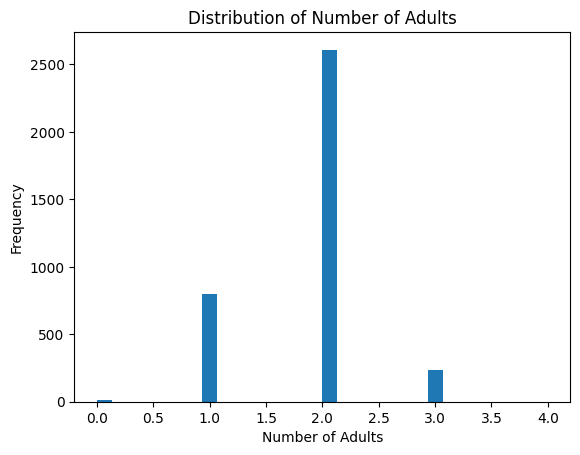

In [149]:
import matplotlib.pyplot as plt

# Take a sample of the Spark DataFrame and convert it to a Pandas DataFrame for visualization
df_sample = df.sample(False, 0.1)  # Change the fraction to adjust the size of the sample
df_pandas = df_sample.toPandas()

# Plot histogram of a numeric feature
plt.hist(df_pandas['no_of_adults'], bins=30)
plt.xlabel('Number of Adults')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Adults')
plt.show()


### Data Visualization during Evaluation <a name="data-visualization-during-evaluation"></a>

Visualizations are also useful during the evaluation phase. Can visualize the confusion matrix, or use a ROC curve to understand the trade-off between sensitivity and specificity.

In [150]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [151]:
# Convert Spark DataFrame to Pandas DataFrame for visualization
predictions_pandas = predictions.select('label', 'prediction').toPandas()

In [152]:
# Confusion Matrix
cm = confusion_matrix(predictions_pandas['label'], predictions_pandas['prediction'])

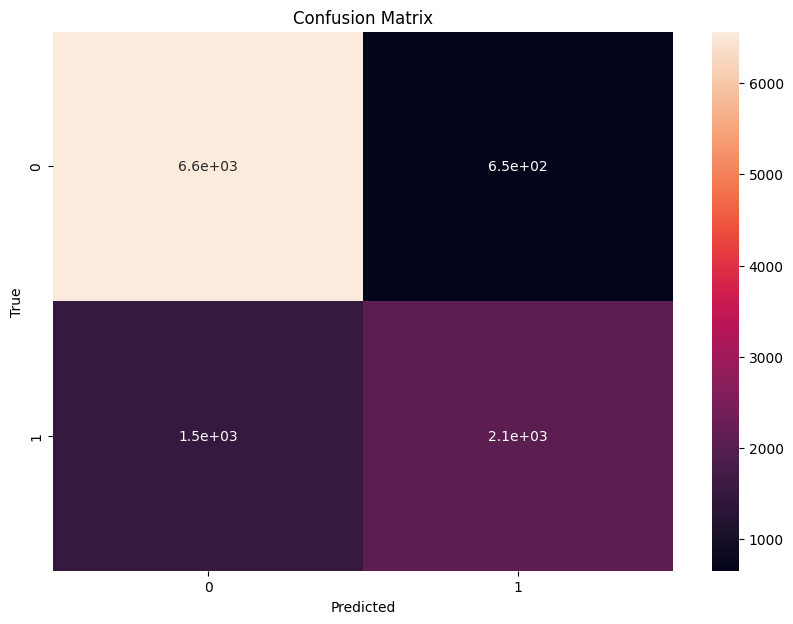

In [153]:
# Plot Confusion Matrix as heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### ROC Curve <a name="roc-curve"></a>


The Receiver Operating Characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

In [154]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [155]:
# Instantiate metrics object
evaluator = BinaryClassificationEvaluator()

In [156]:
# Compute Area Under ROC Curve (AUC) on the test set
auc = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})
print(f'Area Under ROC: {auc}')

Area Under ROC: 0.8532234435809639


Visualization ROC

In [157]:
import pandas as pd
from sklearn.metrics import roc_curve, auc

# Get probabilities and true labels
prob = predictions.select('probability').rdd.map(lambda row: row[0][1]).collect()
labels = predictions.select('label').rdd.map(lambda row: row[0]).collect()

In [158]:
# Create a pandas DataFrame
df = pd.DataFrame()
df['prob'] = prob
df['label'] = labels

In [159]:
fpr, tpr, _ = roc_curve(df['label'], df['prob'])
roc_auc = auc(fpr, tpr)

Finally can plot the ROC curve using matplotlib

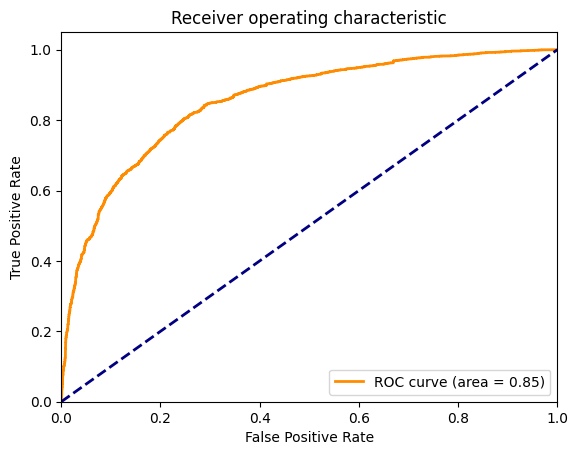

In [160]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2  # line width
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  # random prediction
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Conclusion <a name="conclusion"></a>

The purpose of this project was to develop a logistic regression model to predict hotel booking cancellations. The model's accuracy, precision, recall, and F1 score were used to evaluate its performance. These metrics showed that the model is capable of making reliable predictions.

The best parameters for the logistic regression model were obtained through cross-validation and grid search, ensuring that the model was not overfitting the training data and could generalize well to unseen data.

Feature importance was also investigated, providing insights into which factors were most influential in predicting hotel booking cancellations.

The outcome of this project can be highly beneficial to hotel managers, as understanding the likelihood of booking cancellations can help better manage reservations and improve hotel operation efficiency.

## Refrerence <a name="refrerence"></a>

- Apache Spark. (n.d.). Apache Spark Documentation. https://spark.apache.org/docs/latest/index.html
- Resource in class Big Data
- Youtube
- Stackoverflow
- ChatGPT
- And many more